<a href="https://colab.research.google.com/github/heysourin/Deep-Learning-Projects/blob/main/Car%20Price%20Predicitoin%20with%20Neural%20Nets/car_price_with_neural_nets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [339]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [340]:
df = pd.read_csv('/content/second-hand-car.csv')

In [341]:
df.shape

(1000, 12)

In [342]:
df.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [343]:
df.isna().sum()

v.id             0
on road old      0
on road now      0
years            0
km               0
rating           0
condition        0
economy          0
top speed        0
hp               0
torque           0
current price    0
dtype: int64

In [344]:
X = df.iloc[:, 3:-1]
y = df.iloc[:, -1]

In [345]:
X.shape, y.shape

((1000, 8), (1000,))

In [346]:
y

0      351318.0
1      285001.5
2      215386.0
3      244295.5
4      531114.5
         ...   
995    190744.0
996    419748.0
997    405871.0
998     74398.0
999    414938.5
Name: current price, Length: 1000, dtype: float64

In [347]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [348]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [349]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


In [350]:
model = Sequential()
# model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))
# model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1)) # O/P

# mean_absolute_error
model.compile(optimizer=Adam(learning_rate=0.1),
              loss = MeanAbsoluteError(),
              metrics = ['accuracy']
              )

In [351]:
early_stopping = EarlyStopping(monitor='val_loss', patience=7)

In [352]:
history = model.fit(X_train, y_train, epochs=50,
                    validation_split=0.2,
                    verbose=2,
                    batch_size=10,
                    callbacks=[early_stopping])

Epoch 1/50
64/64 - 1s - loss: 244303.7188 - accuracy: 0.0000e+00 - val_loss: 75621.3828 - val_accuracy: 0.0000e+00 - 1s/epoch - 18ms/step
Epoch 2/50
64/64 - 0s - loss: 49842.9961 - accuracy: 0.0000e+00 - val_loss: 38865.4336 - val_accuracy: 0.0000e+00 - 187ms/epoch - 3ms/step
Epoch 3/50
64/64 - 0s - loss: 42398.4492 - accuracy: 0.0000e+00 - val_loss: 37808.3320 - val_accuracy: 0.0000e+00 - 137ms/epoch - 2ms/step
Epoch 4/50
64/64 - 0s - loss: 41739.7344 - accuracy: 0.0000e+00 - val_loss: 36280.4023 - val_accuracy: 0.0000e+00 - 153ms/epoch - 2ms/step
Epoch 5/50
64/64 - 0s - loss: 42261.7266 - accuracy: 0.0000e+00 - val_loss: 35470.0625 - val_accuracy: 0.0000e+00 - 184ms/epoch - 3ms/step
Epoch 6/50
64/64 - 0s - loss: 42346.6211 - accuracy: 0.0000e+00 - val_loss: 38457.1523 - val_accuracy: 0.0000e+00 - 182ms/epoch - 3ms/step
Epoch 7/50
64/64 - 0s - loss: 40420.4648 - accuracy: 0.0000e+00 - val_loss: 36122.7578 - val_accuracy: 0.0000e+00 - 139ms/epoch - 2ms/step
Epoch 8/50
64/64 - 0s - loss

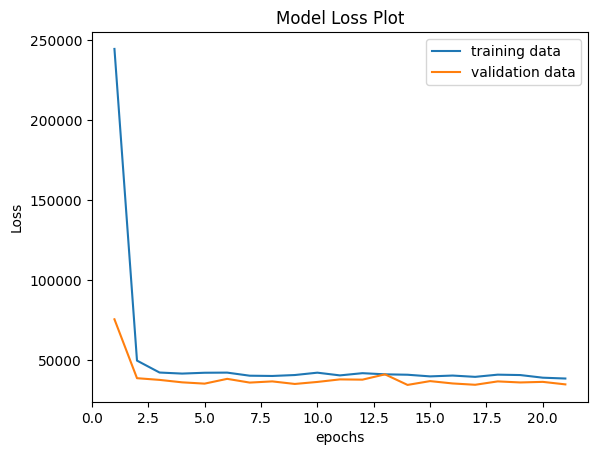

In [353]:
import matplotlib.pyplot as plt

x_values = range(1, len(history.history['loss']) + 1) # To make the x-axis count from 1

plt.plot(x_values, history.history['loss'])
plt.plot(x_values, history.history['val_loss'])

plt.title('Model Loss Plot')
plt.ylabel('Loss')
plt.xlabel('epochs')

plt.legend(['training data', 'validation data'], loc='upper right')

plt.show()

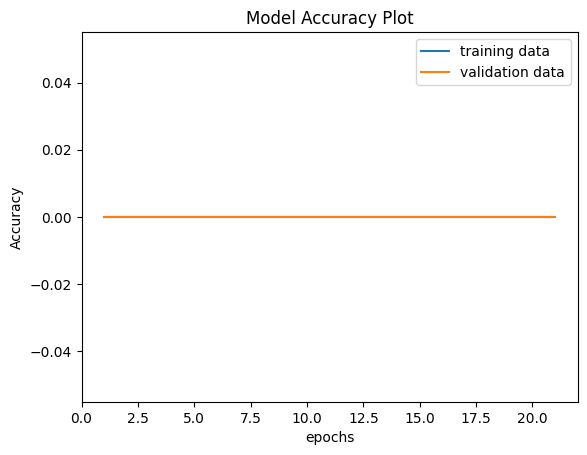

In [354]:
import matplotlib.pyplot as plt

x_values = range(1, len(history.history['accuracy']) + 1) # To make the x-axis count from 1

plt.plot(x_values, history.history['accuracy'])
plt.plot(x_values, history.history['val_accuracy'])

plt.title('Model Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('epochs')

plt.legend(['training data', 'validation data'], loc='upper right')

plt.show()

In [355]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 35949.6055 - accuracy: 0.0000e+00


[35949.60546875, 0.0]

In [356]:
test_pred = model.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [357]:
from sklearn.metrics import r2_score

In [358]:
r2_test = r2_score(y_test, test_pred)
print("R Squared value of test data:", r2_test)

R Squared value of test data: 0.8759748971057633


In [359]:
input_data = (
          6,54712,4,7,12,148,106,115
)
input_data_as_np_array = np.asarray(input_data)

input_data_reshaped = input_data_as_np_array.reshape(1, -1)

input_data_std = sc.transform(input_data_reshaped)

prediction = model.predict(input_data_std)

print(prediction)

1/1 [==============================] - 0s 20ms/step
[[505997.2]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
